학습 (train) -> 정확도 검사

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

%config lnlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

Text(0.5, 1.0, '한글')

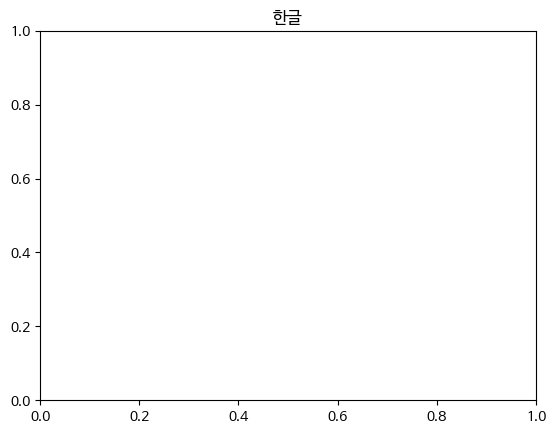

In [1]:
## 런타임 - 세션 다시시작

## 런타임 다시 시작 후 진행
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 확인
plt.title('한글')

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝/DATA/data_건강검진정보_1000_final.csv', encoding ='cp949')
df

,기준년도,가입자 일련번호,시도코드,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),허리둘레,시력(좌),시력(우),...,간기능검사(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석
0,2021,3603281,26,2,9,165,60,83.0,1.0,1.0,...,28.0,11.0,1,1,1,0.0,NaN,NaN,NaN,1.0
1,2021,3367154,27,2,11,155,50,73.0,0.6,0.6,...,8.0,8.0,1,0,0,NaN,NaN,NaN,NaN,NaN
2,2021,1775024,48,2,11,160,60,89.0,0.7,0.6,...,23.0,25.0,1,0,0,NaN,NaN,NaN,NaN,NaN
3,2021,3002805,41,1,12,165,50,75.0,1.0,0.7,...,23.0,14.0,1,0,1,0.0,NaN,NaN,NaN,0.0
4,2021,1289187,41,1,15,160,85,101.0,9.9,0.1,...,33.0,36.0,1,1,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021,3520083,47,1,14,160,65,86.0,0.7,1.0,...,26.0,26.0,1,1,0,NaN,NaN,NaN,NaN,NaN
996,2021,3066268,11,1,10,165,65,87.0,0.9,0.9,...,15.0,22.0,2,1,1,0.0,NaN,NaN,NaN,0.0
997,2021,3824567,28,1,9,170,85,89.0,0.2,0.2,...,18.0,43.0,3,1,1,0.0,NaN,NaN,NaN,0.0
998,2021,3491406,47,1,13,165,65,84.0,1.2,1.5,...,20.0,19.0,2,1,1,0.0,NaN,NaN,NaN,1.0


In [5]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대코드(5세 단위)', '신장(5cm 단위)',
       '체중(5kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', '콜레스테롤(HDL)',
       '콜레스테롤(LDL)', '혈색소', '요단백', '혈청크레아티닌', '간기능검사(AST)', '간기능검사(ALT)',
       '감마지티피', '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무',
       '제3대구치(사랑니)이상', '치석'],
      dtype='object')

In [8]:
#필요한 열 추출
df = df[['성별코드', '신장(5cm 단위)', '체중(5kg 단위)', '허리둘레','수축기 혈압','이완기 혈압','식전혈당(공복혈당)', '트리글리세라이드', '콜레스테롤(HDL)']]
df

,성별코드,신장(5cm 단위),체중(5kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),트리글리세라이드,콜레스테롤(HDL)
0,2,165,60,83.0,105.0,65.0,94.0,NaN,NaN
1,2,155,50,73.0,110.0,71.0,80.0,NaN,NaN
2,2,160,60,89.0,148.0,93.0,135.0,NaN,NaN
3,1,165,50,75.0,90.0,60.0,105.0,NaN,NaN
4,1,160,85,101.0,120.0,70.0,102.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,1,160,65,86.0,110.0,80.0,118.0,151.0,77.0
996,1,165,65,87.0,127.0,88.0,88.0,NaN,NaN
997,1,170,85,89.0,139.0,89.0,207.0,NaN,NaN
998,1,165,65,84.0,138.0,70.0,100.0,NaN,NaN


In [10]:
#열명 변경
df.columns = ['성별', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '트리글리세라이드', '콜레스테롤']
df

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤
0,2,165,60,83.0,105.0,65.0,94.0,NaN,NaN
1,2,155,50,73.0,110.0,71.0,80.0,NaN,NaN
2,2,160,60,89.0,148.0,93.0,135.0,NaN,NaN
3,1,165,50,75.0,90.0,60.0,105.0,NaN,NaN
4,1,160,85,101.0,120.0,70.0,102.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,1,160,65,86.0,110.0,80.0,118.0,151.0,77.0
996,1,165,65,87.0,127.0,88.0,88.0,NaN,NaN
997,1,170,85,89.0,139.0,89.0,207.0,NaN,NaN
998,1,165,65,84.0,138.0,70.0,100.0,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   성별        1000 non-null   int64  
 1   신장        1000 non-null   int64  
 2   체중        1000 non-null   int64  
 3   허리둘레      1000 non-null   float64
 4   수축기혈압     995 non-null    float64
 5   이완기혈압     995 non-null    float64
 6   식전혈당      995 non-null    float64
 7   트리글리세라이드  444 non-null    float64
 8   콜레스테롤     444 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 70.4 KB


In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 5 to 995
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   성별        444 non-null    int64  
 1   신장        444 non-null    int64  
 2   체중        444 non-null    int64  
 3   허리둘레      444 non-null    float64
 4   수축기혈압     444 non-null    float64
 5   이완기혈압     444 non-null    float64
 6   식전혈당      444 non-null    float64
 7   트리글리세라이드  444 non-null    float64
 8   콜레스테롤     444 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 34.7 KB


<ipython-input-12-9174d45f281f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [14]:
import numpy as np

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# 기존 칼럼을 이용해서 새 칼럼 생성
# 1 -> 대사증후군 / 0 -> 대사증후군이 아님

# 높은 혈압(수축기 130이거나, 이완기 85 이상)

df['높은혈압'] = np.where((df['수축기혈압'] >= 130) | (df['이완기혈압'] >= 85), 1, 0)


# 높은 혈당(공복 혈당 100 이상)

df['높은혈당'] = np.where(df['식전혈당'] >= 100, 1, 0)


# 높은 중성지방(트리글리세라이드 150 이상)

df['높은중성지방'] = np.where(df['트리글리세라이드'] >= 150, 1, 0)


# 낮은 콜레스트롤 수치(남성:40미만, 여성:50미만)

df['낮은콜레스트롤'] = np.where((df['성별'] ==1) & (df['콜레스테롤'] < 40) | (df['성별'] == 2) & (df['콜레스테롤'] < 50), 1, 0)


# 복부 비만(남성:90 이상, 여성: 85 이상)

df['복부비만'] = np.where((df['성별'] == 1) & (df['허리둘레'] >= 90) | (df['성별'] == 2) & (df['허리둘레'] >= 85), 1, 0)


# BMI

df['BMI'] = round(df['체중'] / ((df['신장'] / 100) ** 2),2)

df.head()

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,높은혈압,높은혈당,높은중성지방,낮은콜레스트롤,복부비만,BMI
5,1,170,70,82.0,124.0,80.0,83.0,95.0,57.0,0,0,0,0,0,24.22
7,2,135,40,81.0,118.0,63.0,112.0,168.0,42.0,0,1,1,1,0,21.95
8,2,145,50,78.0,148.0,67.0,98.0,70.0,57.0,1,0,0,0,0,23.78
9,2,150,65,83.0,118.0,68.0,111.0,106.0,66.0,0,1,0,0,0,28.89
10,2,155,55,74.0,110.0,77.0,98.0,193.0,35.0,0,0,1,1,0,22.89


In [21]:
df.columns

Index(['성별', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '트리글리세라이드', '콜레스테롤',
       '높은혈압', '높은혈당', '높은중성지방', '낮은콜레스트롤', '복부비만', 'BMI'],
      dtype='object')

In [22]:
# 대사증후군수 : 확인
sel_col = ['높은혈압', '높은혈당', '높은중성지방', '낮은콜레스트롤', '복부비만']
df[sel_col]

,높은혈압,높은혈당,높은중성지방,낮은콜레스트롤,복부비만
5,0,0,0,0,0
7,0,1,1,1,0
8,1,0,0,0,0
9,0,1,0,0,0
10,0,0,1,1,0
...,...,...,...,...,...
985,0,0,1,1,0
989,0,1,0,0,0
992,0,0,0,0,0
993,1,1,0,0,0


In [23]:
# 대사증후군수: 열 합계
sel_col = ['높은혈압', '높은혈당', '높은중성지방', '낮은콜레스트롤', '복부비만']
df[sel_col].sum()

높은혈압       185
높은혈당       207
높은중성지방     126
낮은콜레스트롤     96
복부비만       125
dtype: int64

In [24]:
# 대사증후군수: 행 합계
sel_col = ['높은혈압', '높은혈당', '높은중성지방', '낮은콜레스트롤', '복부비만']
df[sel_col].sum(axis=1)

5      0
7      3
8      1
9      1
10     2
      ..
985    2
989    1
992    0
993    2
995    2
Length: 444, dtype: int64

In [25]:
# 대사증후군수: 행 합계 , 최종 반영
sel_col = ['높은혈압', '높은혈당', '높은중성지방', '낮은콜레스트롤', '복부비만']
df['대사증후군수'] = df[sel_col].sum(axis=1)
df

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,높은혈압,높은혈당,높은중성지방,낮은콜레스트롤,복부비만,BMI,대사증후군수
5,1,170,70,82.0,124.0,80.0,83.0,95.0,57.0,0,0,0,0,0,24.22,0
7,2,135,40,81.0,118.0,63.0,112.0,168.0,42.0,0,1,1,1,0,21.95,3
8,2,145,50,78.0,148.0,67.0,98.0,70.0,57.0,1,0,0,0,0,23.78,1
9,2,150,65,83.0,118.0,68.0,111.0,106.0,66.0,0,1,0,0,0,28.89,1
10,2,155,55,74.0,110.0,77.0,98.0,193.0,35.0,0,0,1,1,0,22.89,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2,150,50,69.0,100.0,64.0,93.0,307.0,37.0,0,0,1,1,0,22.22,2
989,2,155,50,78.0,124.0,70.0,120.0,85.0,62.0,0,1,0,0,0,20.81,1
992,2,155,55,77.0,100.0,71.0,88.0,56.0,71.0,0,0,0,0,0,22.89,0
993,1,160,60,80.2,150.0,90.0,104.0,88.0,71.0,1,1,0,0,0,23.44,2


In [27]:
#대사증후군 판별 (에러코드 확인)
df['대사증후군판별'] = np.where(df['대사증후군수']==0, '정상',
                         np.where(df['대사증후군수'] <=2, '주의군','위험군')
#정상,주의군,위험군 3가지이기 때문에 0이면 정상, 2 이하이면 주의군, 3개 이상이면 위험군

SyntaxError: incomplete input (<ipython-input-27-5585e6b1ddeb>, line 4)

-> 맨 끝 괄호가 하나 빠짐 (괄호 수는 if 구문 개수)

In [28]:
#대사증후군 판별 (에러코드 확인)
df['대사증후군판별'] = np.where(df['대사증후군수']==0, '정상',
                         np.where(df['대사증후군수'] <=2, '주의군','위험군'))
#정상,주의군,위험군 3가지이기 때문에 0이면 정상, 2 이하이면 주의군, 3개 이상이면 위험군

In [29]:
# 비만도 판별
df['비만도판별'] = np.where(df['BMI'] < 20, '저체중',
                         np.where(df['BMI'] < 25, '정상',
                                  np.where(df['BMI'] < 30, '과체중', '비만')))

# 성별 판별
df['성별'] = np.where(df['성별'] == 1, '남', '여')
df

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,높은혈압,높은혈당,높은중성지방,낮은콜레스트롤,복부비만,BMI,대사증후군수,대사증후군판별,비만도판별
5,남,170,70,82.0,124.0,80.0,83.0,95.0,57.0,0,0,0,0,0,24.22,0,정상,정상
7,여,135,40,81.0,118.0,63.0,112.0,168.0,42.0,0,1,1,1,0,21.95,3,위험군,정상
8,여,145,50,78.0,148.0,67.0,98.0,70.0,57.0,1,0,0,0,0,23.78,1,주의군,정상
9,여,150,65,83.0,118.0,68.0,111.0,106.0,66.0,0,1,0,0,0,28.89,1,주의군,과체중
10,여,155,55,74.0,110.0,77.0,98.0,193.0,35.0,0,0,1,1,0,22.89,2,주의군,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,여,150,50,69.0,100.0,64.0,93.0,307.0,37.0,0,0,1,1,0,22.22,2,주의군,정상
989,여,155,50,78.0,124.0,70.0,120.0,85.0,62.0,0,1,0,0,0,20.81,1,주의군,정상
992,여,155,55,77.0,100.0,71.0,88.0,56.0,71.0,0,0,0,0,0,22.89,0,정상,정상
993,남,160,60,80.2,150.0,90.0,104.0,88.0,71.0,1,1,0,0,0,23.44,2,주의군,정상


In [30]:
df.reset_index(drop=True, inplace=True)
df

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,높은혈압,높은혈당,높은중성지방,낮은콜레스트롤,복부비만,BMI,대사증후군수,대사증후군판별,비만도판별
0,남,170,70,82.0,124.0,80.0,83.0,95.0,57.0,0,0,0,0,0,24.22,0,정상,정상
1,여,135,40,81.0,118.0,63.0,112.0,168.0,42.0,0,1,1,1,0,21.95,3,위험군,정상
2,여,145,50,78.0,148.0,67.0,98.0,70.0,57.0,1,0,0,0,0,23.78,1,주의군,정상
3,여,150,65,83.0,118.0,68.0,111.0,106.0,66.0,0,1,0,0,0,28.89,1,주의군,과체중
4,여,155,55,74.0,110.0,77.0,98.0,193.0,35.0,0,0,1,1,0,22.89,2,주의군,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,여,150,50,69.0,100.0,64.0,93.0,307.0,37.0,0,0,1,1,0,22.22,2,주의군,정상
440,여,155,50,78.0,124.0,70.0,120.0,85.0,62.0,0,1,0,0,0,20.81,1,주의군,정상
441,여,155,55,77.0,100.0,71.0,88.0,56.0,71.0,0,0,0,0,0,22.89,0,정상,정상
442,남,160,60,80.2,150.0,90.0,104.0,88.0,71.0,1,1,0,0,0,23.44,2,주의군,정상


In [31]:
# 교차표 생성 : 두 범주형 변수 간의 관계를 분석할 때 사용
pd.crosstab(df['비만도판별'], df['대사증후군판별'])

대사증후군판별,위험군,정상,주의군
비만도판별,,,
과체중,51,6,82
비만,16,0,7
저체중,0,28,15
정상,40,56,143


In [39]:
# 순서 변경 및 reindex
order_idx =['저체중','정상','과체중', '비만']
order_col = ['정상', '주의군', '위험군']

cross_tab = pd.crosstab(df['비만도판별'], df['대사증후군판별']).reindex(index=order_idx, columns=order_col)
cross_tab

대사증후군판별,정상,주의군,위험군
비만도판별,,,
저체중,28,15,0
정상,56,143,40
과체중,6,82,51
비만,0,7,16


In [40]:
#대사증후군별, BMI 평균
df.groupby('대사증후군판별')['BMI'].mean()

대사증후군판별
위험군    26.434860
정상     21.517889
주의군    24.060810
Name: BMI, dtype: float64

In [41]:
from scipy import stats

In [42]:
#대사증후군판별 그룹별로 BMI 데이터 분리 (3집단으로 나누기 -> 리스트화)
groups = df.groupby('대사증후군판별')['BMI'].apply(list)
groups

대사증후군판별
위험군    [21.95, 28.06, 30.61, 33.33, 26.67, 25.95, 25....
정상     [24.22, 18.73, 20.81, 20.2, 20.76, 17.3, 18.37...
주의군    [23.78, 28.89, 22.89, 22.89, 20.81, 25.95, 31....
Name: BMI, dtype: object

In [43]:
# ANOVA 검증
f_value, p_value = stats.f_oneway(*groups)
#일원배치(oneway) : factor(독립변수) 1개
print(f'F-값 : {f_value}, p-값 : {p_value}')

F-값 : 58.408142041362666, p-값 : 3.143416740809794e-23


p-값 : 3.143416740809794e-23 ->왼쪽으로 23번 감 -> **p가 0.05 이하이기 때문에** 귀무가설을 기각하고 대립가설을 채택한다 -> 세 집단은 차이가 없다(귀무가설) - X / **세 집단 간의 차이는 유의미하게 있다** (대립가설) - O

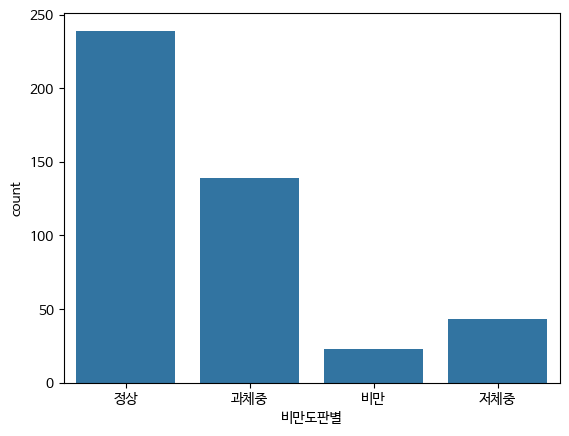

In [44]:
#성별과 비만
import seaborn as sns
sns.countplot(x='비만도판별', data=df)
plt.show()

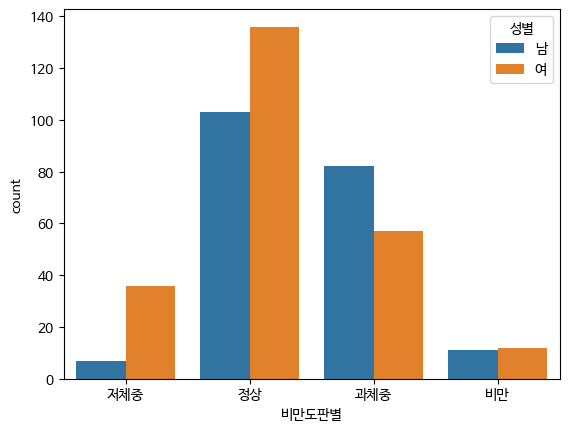

In [45]:
#성별과 비만 : 순서 변경, hue 사용
sns.countplot(x='비만도판별', order=['저체중','정상','과체중', '비만'], hue='성별', data=df)
plt.show()

In [46]:
# 학습 데이터 저장
df.to_excel('/content/drive/MyDrive/데이터마이닝/DATA/건강검진정보_학습데이터.xlsx')

In [47]:
data = pd.read_excel('/content/drive/MyDrive/데이터마이닝/DATA/건강검진정보_학습데이터.xlsx')
data

,Unnamed: 0,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,높은혈압,높은혈당,높은중성지방,낮은콜레스트롤,복부비만,BMI,대사증후군수,대사증후군판별,비만도판별
0,0,남,170,70,82.0,124,80,83,95,57,0,0,0,0,0,24.22,0,정상,정상
1,1,여,135,40,81.0,118,63,112,168,42,0,1,1,1,0,21.95,3,위험군,정상
2,2,여,145,50,78.0,148,67,98,70,57,1,0,0,0,0,23.78,1,주의군,정상
3,3,여,150,65,83.0,118,68,111,106,66,0,1,0,0,0,28.89,1,주의군,과체중
4,4,여,155,55,74.0,110,77,98,193,35,0,0,1,1,0,22.89,2,주의군,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,439,여,150,50,69.0,100,64,93,307,37,0,0,1,1,0,22.22,2,주의군,정상
440,440,여,155,50,78.0,124,70,120,85,62,0,1,0,0,0,20.81,1,주의군,정상
441,441,여,155,55,77.0,100,71,88,56,71,0,0,0,0,0,22.89,0,정상,정상
442,442,남,160,60,80.2,150,90,104,88,71,1,1,0,0,0,23.44,2,주의군,정상


-> unnamed 없애기

In [50]:
df.to_excel('/content/drive/MyDrive/데이터마이닝/DATA/건강검진정보_학습데이터.xlsx', index=False)

In [51]:
data = pd.read_excel('/content/drive/MyDrive/데이터마이닝/DATA/건강검진정보_학습데이터.xlsx')
data

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,높은혈압,높은혈당,높은중성지방,낮은콜레스트롤,복부비만,BMI,대사증후군수,대사증후군판별,비만도판별
0,남,170,70,82.0,124,80,83,95,57,0,0,0,0,0,24.22,0,정상,정상
1,여,135,40,81.0,118,63,112,168,42,0,1,1,1,0,21.95,3,위험군,정상
2,여,145,50,78.0,148,67,98,70,57,1,0,0,0,0,23.78,1,주의군,정상
3,여,150,65,83.0,118,68,111,106,66,0,1,0,0,0,28.89,1,주의군,과체중
4,여,155,55,74.0,110,77,98,193,35,0,0,1,1,0,22.89,2,주의군,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,여,150,50,69.0,100,64,93,307,37,0,0,1,1,0,22.22,2,주의군,정상
440,여,155,50,78.0,124,70,120,85,62,0,1,0,0,0,20.81,1,주의군,정상
441,여,155,55,77.0,100,71,88,56,71,0,0,0,0,0,22.89,0,정상,정상
442,남,160,60,80.2,150,90,104,88,71,1,1,0,0,0,23.44,2,주의군,정상
